In [5]:
import pandas as pd


csv_dir = '/mnt/hgfs/VM_share/liver_project/csv/'
csv_path = 'Figure_S_cat_plot_liver_attenuation_AI-ROI_vs_manual_roi_616.csv'
bi_fat_df = pd.read_csv(csv_dir + csv_path)

data = bi_fat_df
data_set_list = sorted(list(set(bi_fat_df['data_set'].tolist())))

print(data.shape,'\ndata_set_list:',data_set_list)
data.head()
# method = 'dice_score'


(1230, 4) 
data_set_list: ['LIDC_IDRI', 'LUNG1', 'MIDRC-RICORD', 'RIDER', 'VESSEL12', 'covid_china', 'covid_italy']


,data_set,CT_id,roi_attenuation,ai_derived
0,covid_china,covid_0700,50.85702,1
1,covid_china,covid_0701,55.18537,1
2,covid_china,covid_0702,44.04323,1
3,covid_china,covid_0703,36.60765,1
4,covid_china,covid_0704,56.26933,1


In [6]:

y_col = 'roi_attenuation'
class_by = 'ai_derived'

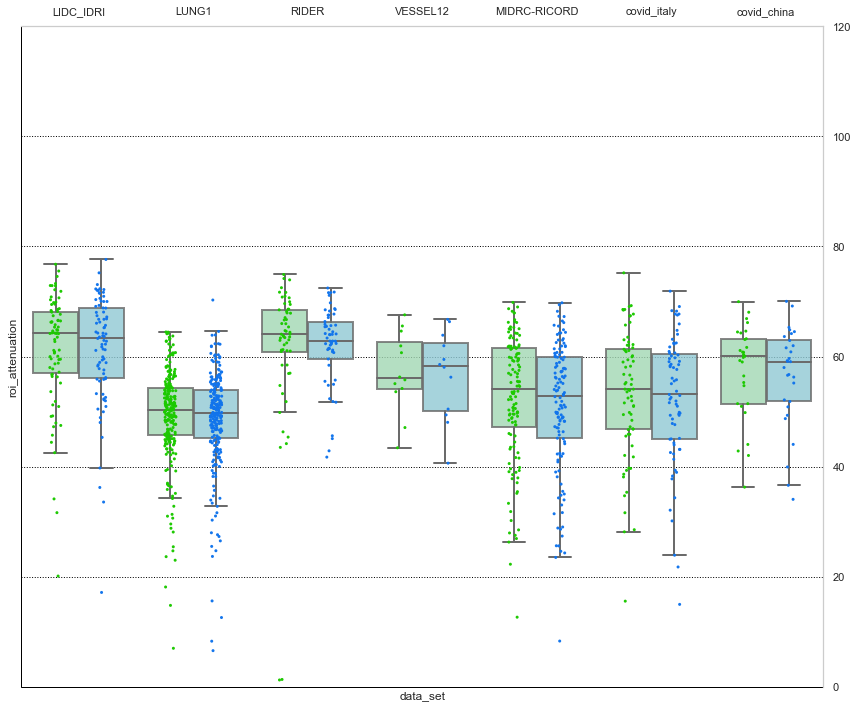

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

sns.set(rc={"figure.figsize":(60, 25)}) #width=3, #height=4

plt_order = ['LIDC_IDRI','LUNG1', 'RIDER','VESSEL12',\
                        'MIDRC-RICORD','covid_italy','covid_china']

data_set_col = 'data_set'

# sns.set(font_scale = 1.8)
# # sns.set_style("ticks")

sns.set_style( 'whitegrid',{"grid.color": ".0", "grid.linestyle": ":"})
ax = sns.catplot(x= data_set_col, y= y_col, data=bi_fat_df, hue= class_by,
              kind="box", order = plt_order,  height=10, aspect=1.2,showfliers = False, \
                                  boxprops=dict(alpha=.8),      
                 linewidth = 2,                  
                   palette=sns.color_palette(['#99e0b0ff','#84d1e0ff' ]),  legend = False)

ax = sns.stripplot(x= data_set_col, y= y_col,data=bi_fat_df, hue=class_by,order = plt_order,                    
                            jitter=True,
                            dodge=True, 
                   palette=sns.color_palette(['#1cc900ff', '#1174ecff']),                   
                            alpha=0.99,size= 3
                            )
ax.get_legend().remove()
ax.patch.set_edgecolor('black')  
sns.despine(top=False, right=False, left=True, bottom=True)
# sns.despine(top=False, left=True, right=True, bottom=True)


ax.patch.set_linewidth('1') 
plt.ylim(0,120)
plt.savefig('pattenuation_cat_plots_645_' + class_by +'.png', dpi = 360)

# plt.show()
# plt.title("attenuation_cat_plots_n1014.pnd", fontsize  = 30)
# plt.xlabel('')
# plt.ylabel('')



In [14]:
import numpy as np
from scipy import stats

col_list = sorted(list(set(bi_fat_df['data_set'].tolist())))

for col in col_list:
    print(col,':')
    df_compare = bi_fat_df[bi_fat_df['data_set'] == col]
    print(df_compare.shape)
    ai_df = df_compare[df_compare['ai_derived']==1] 
    gd_df = df_compare[df_compare['ai_derived']==0] 

    ai_density = ai_df['roi_attenuation']
    gd_density = gd_df['roi_attenuation']
    all_dsc = df_compare['roi_attenuation']
    
    
    ks_s, ks_p = stats.ks_2samp(ai_density, gd_density)

    if ks_p >0.05:
        print(col, '\t\t:ks_p_value',ks_p,' Not Significant \n')
    elif ks_p < 0.05 and ks_p >=0.01:
        print(col, '\t\t:*',ks_p,' Significant \n')
    elif ks_p < 0.01 and ks_p >=0.001:
        print(col, '\t\t:**',ks_p,' Significant \n')
    elif ks_p < 0.001 :
        print(col, '\t\t:***',ks_p,' Significant \n')            
    print()


LIDC_IDRI :
(160, 4)
LIDC_IDRI 		:ks_p_value 0.9793613278485205  Not Significant 


LUNG1 :
(476, 4)
LUNG1 		:ks_p_value 0.9236554988808061  Not Significant 


MIDRC-RICORD :
(256, 4)
MIDRC-RICORD 		:ks_p_value 0.629143638172743  Not Significant 


RIDER :
(114, 4)
RIDER 		:ks_p_value 0.6328581863440477  Not Significant 


VESSEL12 :
(24, 4)
VESSEL12 		:ks_p_value 0.9984852944874484  Not Significant 


covid_china :
(58, 4)
covid_china 		:ks_p_value 0.7912277967552497  Not Significant 


covid_italy :
(142, 4)
covid_italy 		:ks_p_value 0.9637035673354328  Not Significant 


